In [3]:
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers import Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [4]:
!unzip "/content/drive/MyDrive/PlantDiseasesData.zip"

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [5]:
base_dir = os.path.join(os.getcwd(), 'New Plant Diseases Dataset(Augmented)')
base_dir1= os.path.join(base_dir, 'New Plant Diseases Dataset(Augmented)')
train_dir = os.path.join(base_dir1, 'train')
validation_dir = os.path.join(base_dir1, 'valid')

In [6]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [7]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
validation_samples=get_files(validation_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(validation_samples,"validation images")

38 Classes
70295 Train images
17572 validation images


In [8]:
img_size=48
batch_size=64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory(train_dir,
                                                  target_size=(48,48),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical', 
                                                  shuffle=True)
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory(validation_dir,
                                                      target_size=(48,48),
                                                      batch_size=batch_size,
                                                      class_mode='categorical', 
                                                       shuffle=True)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [7]:
model=Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape= (48,48,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(38, activation='softmax'))
opt=Adam(lr=0.0005)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [9]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
epochs=20
steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch
validation_steps=validation_generator.n//validation_generator.batch_size

checkpoint=ModelCheckpoint("model_weights.h5", monitor="val_accuracy", save_weights_only=True, model='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor=0.1, patience=2, min_lr= 0.00001, model= 'auto')

history= model.fit(x=train_generator, 
                   steps_per_epoch=steps_per_epoch, 
                   epochs=epochs,            
                   validation_data=validation_generator, 
                   validation_steps=validation_steps)

#saving the model
model.save('my_disease.h5')

Epoch 1/20
1098/1098 [==============================] - 203s 142ms/step - loss: 1.6895 - accuracy: 0.5139 - val_loss: 0.6877 - val_accuracy: 0.7850
Epoch 2/20
1098/1098 [==============================] - 114s 104ms/step - loss: 0.4882 - accuracy: 0.8425 - val_loss: 0.4702 - val_accuracy: 0.8477
Epoch 3/20
1098/1098 [==============================] - 114s 104ms/step - loss: 0.3116 - accuracy: 0.9011 - val_loss: 0.6998 - val_accuracy: 0.8000
Epoch 4/20
1098/1098 [==============================] - 113s 103ms/step - loss: 0.2258 - accuracy: 0.9244 - val_loss: 0.1858 - val_accuracy: 0.9408
Epoch 5/20
1098/1098 [==============================] - 113s 103ms/step - loss: 0.1852 - accuracy: 0.9389 - val_loss: 0.3017 - val_accuracy: 0.9027
Epoch 6/20
1098/1098 [==============================] - 114s 104ms/step - loss: 0.1556 - accuracy: 0.9473 - val_loss: 0.2187 - val_accuracy: 0.9285
Epoch 7/20
1098/1098 [==============================] - 114s 103ms/step - loss: 0.1387 - accuracy: 0.9532 - val_

In [10]:
model.save('drive/MyDrive/PDI.model')

INFO:tensorflow:Assets written to: drive/MyDrive/PDI.model/assets


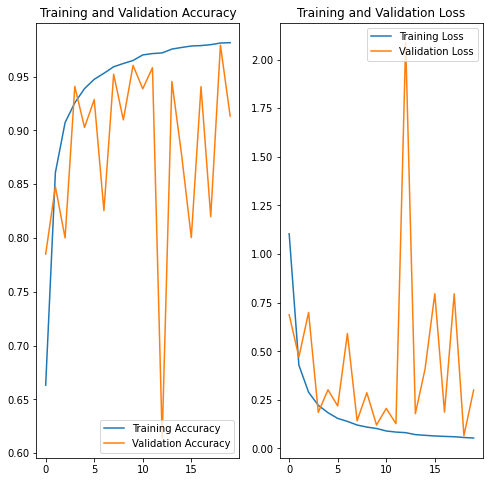

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
  from keras.models import load_model
  classifier = load_model('drive/MyDrive/PDI.model')

In [10]:
from google.colab import files
uploaded = files.upload()

'Apple___Cedar_apple_rust'

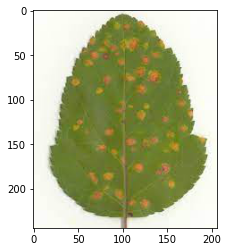

In [11]:
from tensorflow.keras.preprocessing import image
path = "appleCedar.jpg"
test_image = image.load_img(path)
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=(48,48))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = classifier.predict(test_img)
a = result.argmax()
s = train_generator.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
p